In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as dr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



C:\ProgramData\Anaconda3\envs\TicTacToe\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
bac = dr.data.DataReader('BAC', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))
c = dr.data.DataReader('C', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))
# sbin = dr.data.DataReader('SBIN',data_source='yahoo',start=dt.datetime(2006,1,1),end=dt.datetime(2016,1,1))
gs = dr.data.DataReader('GS', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))
jpm = dr.data.DataReader('JPM', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))
ms = dr.data.DataReader('MS', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))
wfc = dr.data.DataReader('WFC', data_source='yahoo', start=dt.datetime(2006, 1, 1), end=dt.datetime(2016, 1, 1))

In [3]:
tickers = ('BAC C GS MS JPM WFC'.split())
tickers.sort()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks = pd.concat([bac, c, gs, jpm, ms, wfc], axis=1, keys=tickers)


In [5]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.523922   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.146645   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.191933   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.139107   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.161732   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.758644  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.784546  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.888165  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.927017  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.328484  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.045347  
2006-01-04  31.530001  10870000.0  20.801256  
2006-01-05  31.495001  10158000.0  20.778162  
2006-01-06  31.680000   8403800.0  20.900213  
2006-01-09  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [7]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
returns=pd.DataFrame()

In [8]:
for ticks in tickers:
    returns[ticks+' return']=bank_stocks[ticks]['Close'].pct_change()

In [9]:
returns.head(5)

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [10]:
returns.dropna(inplace=True)

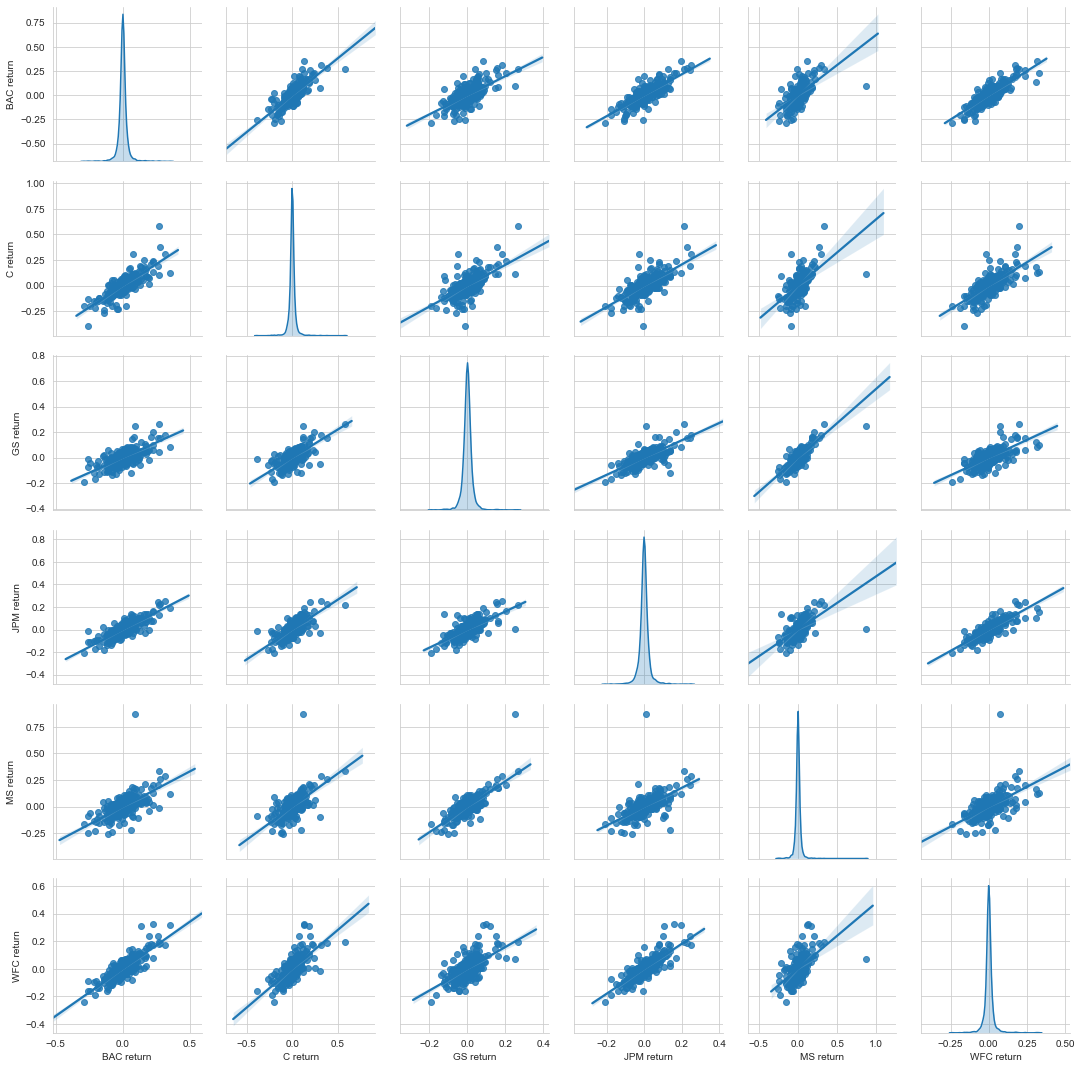

In [11]:
sns.set_style('whitegrid')
sns.pairplot(data=returns[1:],kind = 'reg', diag_kind='kde', )

In [12]:
plt.show()

In [13]:
ret_max=pd.Series()
ret_min=pd.Series()
def check_ret_max():
    for p in tickers:
        ret_max.append(returns[p+' return'].argmax())
    return ret_max()
def check_ret_min():
    for p in tickers:
        ret_min.append(returns[p+' return'].argmin())
    return ret_min()


    

In [14]:
check_ret_min()
check_ret_max()

print (ret_max)
print(ret_min)

C:\ProgramData\Anaconda3\envs\DataCapstone\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if __name__ == '__main__':


TypeError: cannot concatenate object of type '<class 'pandas._libs.tslibs.timestamps.Timestamp'>'; only Series and DataFrame objs are valid

In [15]:
returns.apply(np.std)

BAC return    0.036640
C return      0.038664
GS return     0.025385
JPM return    0.027662
MS return     0.037812
WFC return    0.030232
dtype: float64

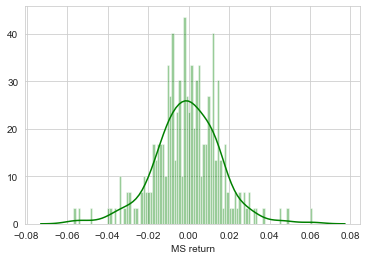

In [16]:
sns.distplot(returns.loc[dt.datetime(2015,1,1):dt.datetime(2015,12,31)]['MS return'],bins=100,color='green',kde=True)
plt.show()

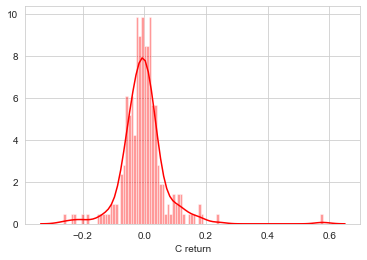

In [17]:
sns.distplot(returns.loc[dt.datetime(2008,1,1):dt.datetime(2008,12,31)]['C return'],bins=100,color='red')

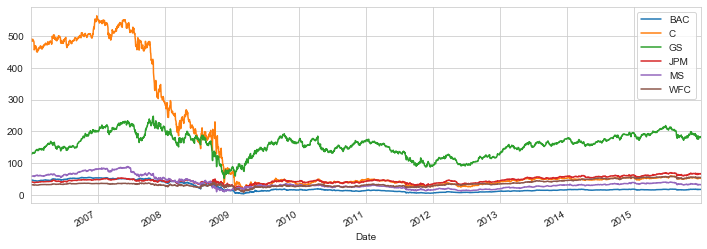

In [18]:
bank_stocks.xs(key='Close',level=1,axis=1).plot(figsize=(12,4),label=ticks)
plt.legend()

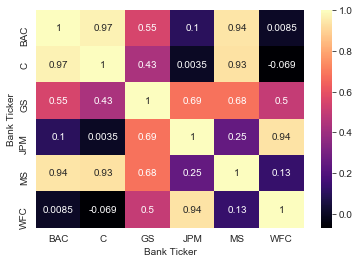

In [19]:
sns.heatmap(bank_stocks.xs(key='Close',level=1,axis=1).corr(),cmap='magma',annot=True)

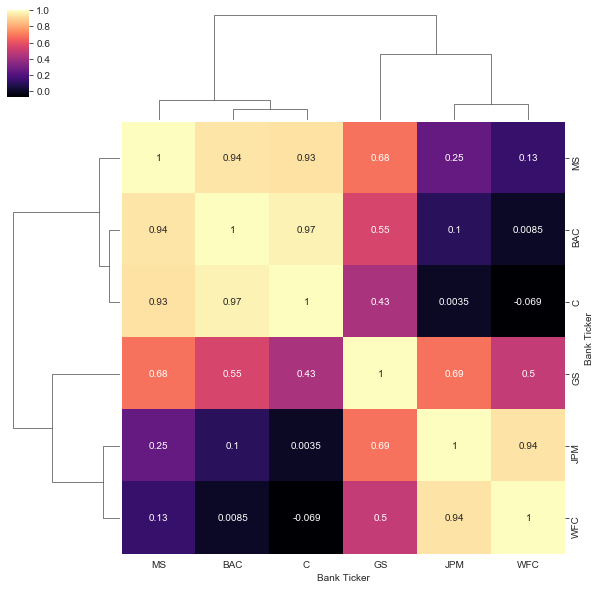

In [20]:
sns.clustermap(bank_stocks.xs(key='Close',level=1,axis=1).corr(),cmap='magma',annot=True)